# 03_Module

## Logistic regression

example is from https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a

** 1. Loading the data (digits) **

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()

** 2. Data structure **

In [2]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print('Image Data Shape' , digits.data.shape)

('Image Data Shape', (1797, 64))


In [3]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [4]:
# Print to show there are 1797 labels (integers from 0–9)
print("Label Data Shape", digits.target.shape)

('Label Data Shape', (1797,))


In [5]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

** 3. Visualization **

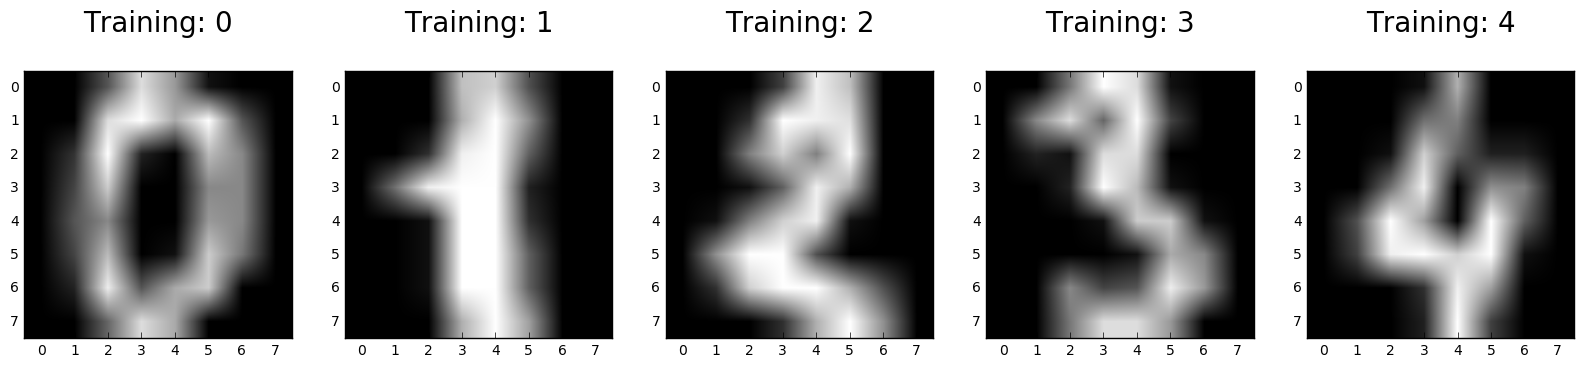

In [6]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

** 4. Splitting data **

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

** 5. Load logistic regression model **

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()

In [11]:
LogisticRegression?

** 6. Train the model **

In [12]:
logisticRegr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

** 7. Test the model **

In [13]:
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(x_test[0].reshape(1,-1))

array([2])

In [14]:
logisticRegr.predict(x_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [15]:
predictions = logisticRegr.predict(x_test)

** 8. Evaluate the model **

In [17]:
# Use score method to get accuracy of model
score_1 = logisticRegr.score(x_test, y_test)
print(score_1)

0.9533333333333334


In [20]:
from sklearn.model_selection import cross_validate

scores_2 = cross_validate(logisticRegr, x_test, y_test, scoring='precision_macro', cv=5, return_train_score=False)

In [21]:
scores_2

{'fit_time': array([0.0222609 , 0.02213311, 0.02333903, 0.03431702, 0.02402782]),
 'score_time': array([0.00113297, 0.00068498, 0.0007329 , 0.00095701, 0.00073099]),
 'test_score': array([0.97070707, 0.93611111, 0.98090909, 0.91542735, 0.96070707])}

In [22]:
# various scoring options: http://scikit-learn.org/stable/modules/cross_validation.html

** 8.1 Confusion matrix **

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [111]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]


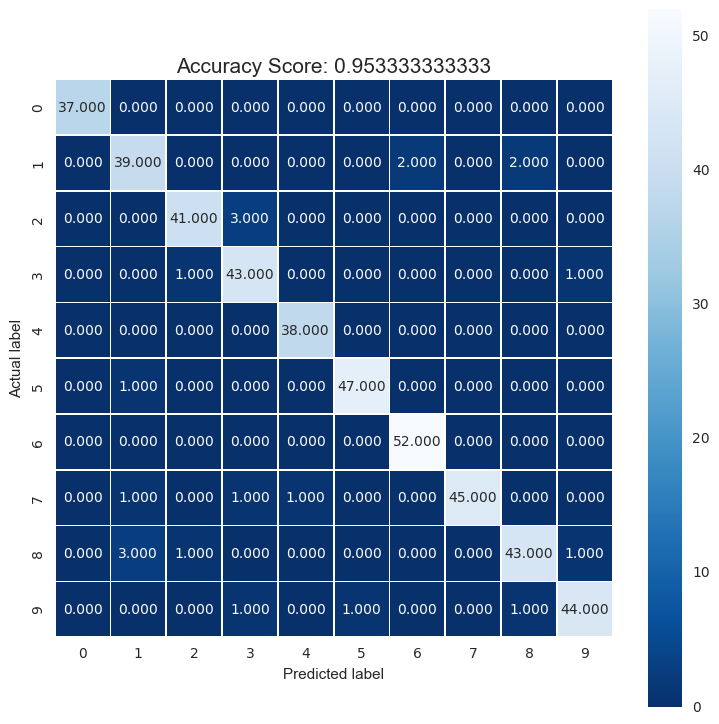

In [112]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

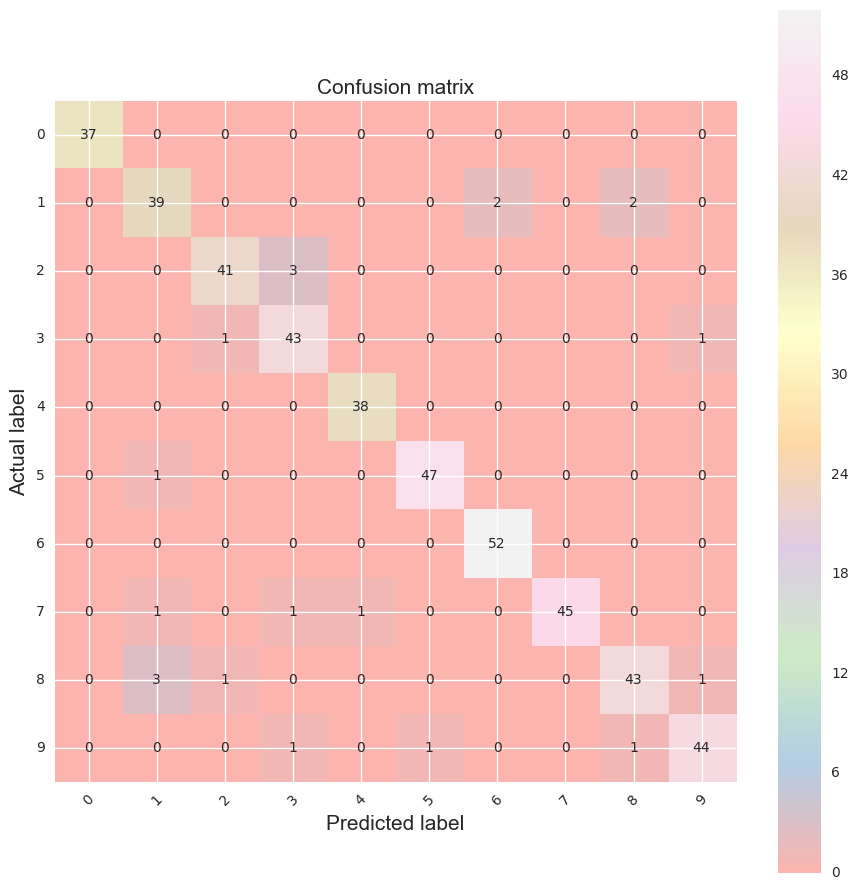

In [113]:
plt.figure(figsize=(9,9))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion matrix', size = 15)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], rotation=45, size = 10)
plt.yticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape
for x in xrange(width):
    for y in xrange(height):
        plt.annotate(str(cm[x][y]), xy=(y, x), horizontalalignment='center',verticalalignment='center')

** 9. Wrong classification **

In [114]:
misclassifiedIndexes = []
for i in range(len(y_test)):
    if y_test[i] != predictions[i]:
        misclassifiedIndexes.append(i)

In [115]:
misclassifiedIndexes

[37,
 94,
 109,
 124,
 130,
 181,
 196,
 211,
 218,
 235,
 251,
 301,
 312,
 331,
 335,
 378,
 398,
 413,
 416,
 425,
 440]

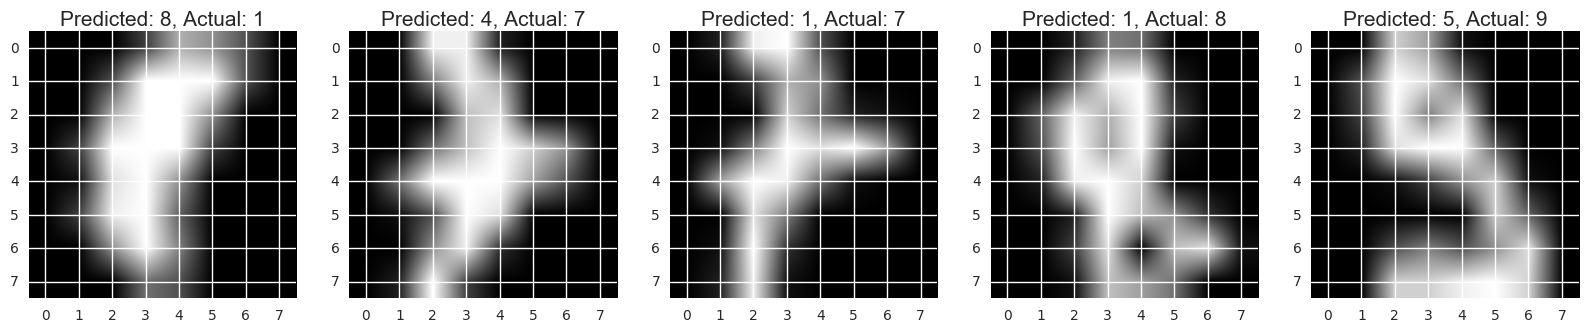

In [116]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(x_test[badIndex], (8,8)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], y_test[badIndex]), 
              fontsize = 15)

## Neural network based classification

example is from https://stackabuse.com/introduction-to-neural-networks-with-scikit-learn/

** 1. Import data **

In [117]:
import pandas as pd

# Location of dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
irisdata = pd.read_csv(url, names=names)  

** 2. Data structure **

In [118]:
irisdata.head()  

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [119]:
# Assign data from first four columns to X variable
X = irisdata.iloc[:, 0:4]

# Assign data from first fifth columns to y variable
y = irisdata.select_dtypes(include=[object])  

In [120]:
X.head()

,sepal-length,sepal-width,petal-length,petal-width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [121]:
y.head()

,Class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [122]:
y.Class.unique()  

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [123]:
from sklearn import preprocessing  
le = preprocessing.LabelEncoder()

y = y.apply(le.fit_transform)  

In [124]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [125]:
y.Class.unique()

array([0, 1, 2])

** 3. Split data **

In [126]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

** 4. Feature scaling **

In [127]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

** 5. Training the model **

In [128]:
from sklearn.neural_network import MLPClassifier  
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)  
mlp.fit(X_train, y_train.values.ravel())  

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [129]:
predictions = mlp.predict(X_test)  

In [130]:
predictions

array([2, 2, 0, 2, 2, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 2, 0, 1,
       0, 0, 0, 0, 2, 0, 2, 0])

** 6. Evaluation **

In [131]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  

[[11  0  0]
 [ 0  8  0]
 [ 0  2  9]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       0.80      1.00      0.89         8
          2       1.00      0.82      0.90        11

avg / total       0.95      0.93      0.93        30



## Neural network based regression

the data is from UC Irvine Machine Learning repository

** 1. Read data **

In [132]:
eD = pd.read_csv('energyData.csv') 

In [133]:
eD.columns

Index([u'X1', u'X2', u'X3', u'X4', u'X5', u'X6', u'X7', u'X8', u'Y1'], dtype='object')

In [134]:
len(eD)

768

In [135]:
eD.size

6912

In [136]:
eD.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84


In [1]:
sns.boxplot(y=eD['Y1'])

NameError: name 'plt' is not defined

** 2. Separate the data **

In [138]:
X = eD.iloc[:, 0:8]

y = eD['Y1']

In [139]:
X.head()

,X1,X2,X3,X4,X5,X6,X7,X8
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0


In [140]:
y.head()

0    15.55
1    15.55
2    15.55
3    15.55
4    20.84
Name: Y1, dtype: float64

** 3. Split the data & 4. Learn the model**

In [141]:
from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [142]:
train_test_split?

In [143]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes=(10, 10, 10), max_iter=1000)  
model.fit(X_train, y_train) 

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [144]:
MLPRegressor?

In [145]:
predictions = model.predict(X_test)  

In [146]:
predictions

array([18.47762749, 15.5130358 ,  6.41213356,  9.55598382,  6.50138875,
       24.91119541, 39.05263211, 23.8590108 , 20.82639325, 23.98857215,
       26.6972464 ,  9.3076584 , 15.4463901 ,  6.30842138, 24.96626485,
       18.60105524, 23.90076878,  6.39868694, 27.01830936, 15.33703106,
       38.97905199, 12.27964645, 20.86815122, 18.60223331, 18.67190601,
       21.83694201, 18.57358868, 23.97977493, 20.71602308, 12.51452524,
       26.64714488, 26.57762089, 21.78318695, 39.13118014, 23.95178209,
       12.29208268,  9.27818321,  6.27894618, 20.72099099, 18.56069804,
       15.52828258, 12.34744072, 26.60944303,  9.51306201, 20.7261902 ,
       26.59613157, 26.51758353,  9.31309073, 26.54511825, 15.45928074,
       39.11198897, 24.88771682, 23.91002411, 23.88654552, 18.6981945 ,
       12.34845111, 12.26619983, 21.81065351, 20.8180497 ,  6.3433289 ,
       21.79422866, 39.00253058, 27.06932267, 23.88248939, 24.9804881 ,
       18.69634557, 26.93976132, 21.90476577, 23.87752148, 18.72

** 5. Visualization & Evaluation **

In [147]:
import seaborn as sns
%matplotlib inline

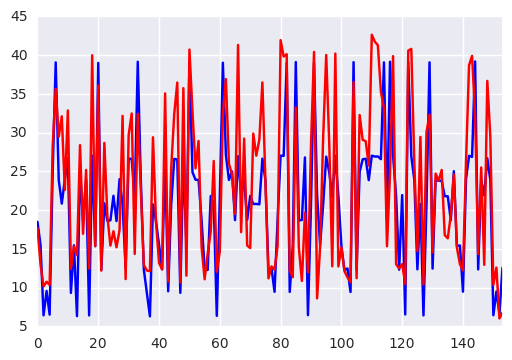

In [148]:
sns.tsplot(predictions, color='b')
sns.tsplot(y_test, color='r')

In [149]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, predictions)

41.8052340215319

In [150]:
mean_squared_error?
# scikitlearn model evaluation google search for other evaluation metrics